In [53]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [54]:
import numpy as np

In [55]:
## TO DO:
"""
1. Heater manual tracking
2. Output gif, stop outputting onto notebook
3. Histogram plots
4. STPFitter calculate E-field --> Calculate Z* and Z

1. Investigate why get negative translated molecules
2. plot Ea vs Vg using MSD method
3. Deal with MSD fit looking not linear
4. Record heater temperature profile
5. fit log(msd) to get intercept (alpha) ~ 1
"""

'\n1. Heater manual tracking\n2. Output gif, stop outputting onto notebook\n3. Histogram plots\n4. STPFitter calculate E-field --> Calculate Z* and Z\n\n1. Investigate why get negative translated molecules\n2. plot Ea vs Vg using MSD method\n3. Deal with MSD fit looking not linear\n4. Record heater temperature profile\n5. fit log(msd) to get intercept (alpha) ~ 1\n'

In [56]:
emds = []
#-60Vg
Vg = -60
voltages_temperatures = np.linspace(32, 32, 1, dtype=np.float32)
START = 204
SIZE = 4
FOLDER = "electromigration_33"
sets = [range(START + SIZE * i, START + SIZE * (i + 1) + 1) for i in range(len(voltages_temperatures))]
emd = ExpMetaData(sets, Vg, voltages_temperatures, FOLDER)
emds.append(emd)

In [60]:
# Refresh dps def.
dps = []
for i, m in enumerate(ms):
    dp = DiffusionPlotter(m)
    dp.plot_diffusion(suppress_output = True)
    dps.append(dp)

In [86]:
dp = DiffusionPlotter(m) 

NameError: name 'rot' is not defined

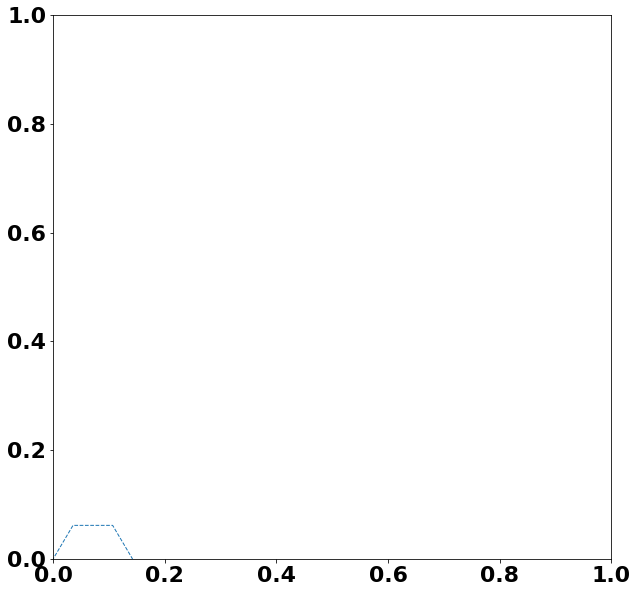

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
hexagon = patches.RegularPolygon((a/2/np.sqrt(3), 0), 6, radius=a/2/np.sqrt(3), orientation=np.pi/2, 
                                   edgecolor = "C0", linewidth=1, linestyle='--', fill = False)
ax.add_patch(hexagon)

cp_idx = rot.apply(lambda row: hexagon.contains_point(ax.transData.transform([row.dx,row.dy])), axis=1 )

ax.scatter(rot.dx, rot.dy)
ax.scatter(rot[cp_idx].dx, rot[cp_idx].dy,color='r')
tx, ty = 0.3, 0
ax.scatter([tx],[ty],color='g')
print(hexagon.contains_point([tx,ty]))
plt.xlim([-plotrange,plotrange])
plt.ylim([-plotrange,plotrange])

NameError: name 'rot' is not defined

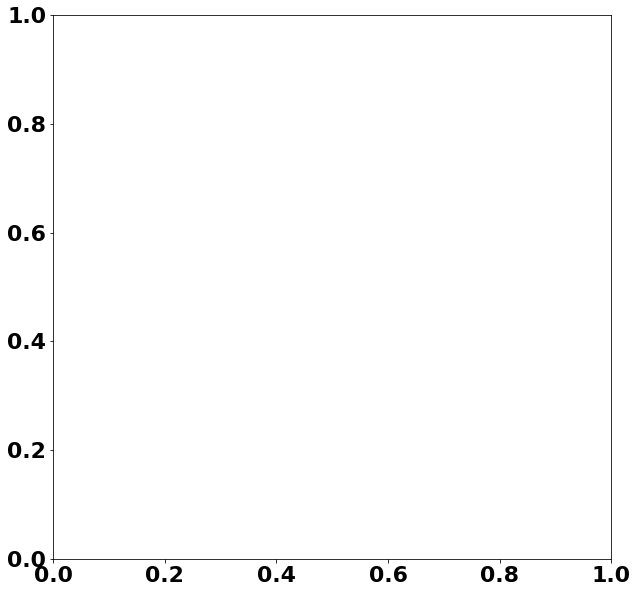

In [80]:
from sklearn.neighbors import NearestNeighbors
def calculate_dist(X0, X1):
    '''
    This function takes a list of subject coords of parcels X1 and 
    returns the nearest distance to a list of coords of target parcels X0
    e.g. calculate_dist(road_parcels, sold_parcels)
    '''
    neigh = NearestNeighbors(n_neighbors=1, radius=10.0, algorithm = 'kd_tree')
    neigh.fit(X0)
    dist, _ = neigh.kneighbors(X1)
    return dist

def overlay_lattice_points(ax, a, trunc_lattice, rot, color="C0", fill = False):
    for _, point in trunc_lattice.iterrows():
        hexagon = patches.RegularPolygon((point.x, point.y), 6, radius=a/2/np.sqrt(3), orientation=np.pi/2, 
                                  edgecolor=color, linewidth=1, linestyle='--', fill = fill, alpha=0.7)
        ax.add_patch(hexagon)
        if fill:
            cp_idx = rot.apply(lambda row: hexagon.contains_point(ax.transData.transform([row.dx,row.dy])), axis=1)
            ax.scatter(rot[cp_idx].dx, rot[cp_idx].dy,color='r')
            count = len(rot[cp_idx])
            hexagon.set_facecolor(plt.cm.hot(count/25))
            ax.text(point.x, point.y, f'{count}')

def calculate_lattice_points(a):
    plotrange = 1
    a1 = np.array([np.sqrt(3)/2*a, a/2])
    a2 = np.array([np.sqrt(3)/2*a, -a/2])
    lattice_points = []
    btw_lattice_points = []
    for i in range(-30,30):
        for j in range(-30,30):
            lattice_points.append(i*a1 + j*a2)
            btw_lattice_points.append((i*a1 + j*a2)/2)
    lattice_points = np.array(lattice_points) 
    lattice_df = pd.DataFrame(lattice_points)
    lattice_df = lattice_df.rename(columns={0: "x", 1: "y"})
    trunc_lattice = lattice_df[(lattice_df.x <plotrange) & (lattice_df.x >-plotrange) & (lattice_df.y <plotrange) & (lattice_df.y >-plotrange)]

    btw_lattice_df = pd.DataFrame(np.array(btw_lattice_points)).rename(columns={0: "x", 1: "y"})
    btwdf = pd.merge(btw_lattice_df, lattice_df, how='left', on=['x', 'y'], indicator=True)
    btw_lattice_df = btwdf[btwdf['_merge'] == 'left_only']
    btw_trunc_lattice = btw_lattice_df[(btw_lattice_df.x <plotrange) & (btw_lattice_df.x >-plotrange) & (btw_lattice_df.y <plotrange) & (btw_lattice_df.y >-plotrange)]
    return trunc_lattice, btw_trunc_lattice
    
fig, ax = plt.subplots(figsize=(10,10))
a = 0.246
trunc_lattice, btw_trunc_lattice = calculate_lattice_points(a)
overlay_lattice_points(ax, a, btw_trunc_lattice, rot, color = "C1", fill=True)
overlay_lattice_points(ax, a, trunc_lattice, rot, color = "C0", fill=True)


dist_tran = calculate_dist(list(zip(trunc_lattice.x, trunc_lattice.y)), list(zip(rot.dx, rot.dy)))
dist_rot = calculate_dist(list(zip(btw_trunc_lattice.x, btw_trunc_lattice.y)), list(zip(rot.dx, rot.dy)))
rot['rot_ind'] = dist_tran > dist_rot
tran_p = rot[~rot['rot_ind']]
rot_p = rot[rot['rot_ind']]
plt.scatter(tran_p.dx,tran_p.dy, color = 'C0')
plt.scatter(rot_p.dx,rot_p.dy, color = 'C1')

plotrange = 1
plt.xlim([-plotrange,plotrange])
plt.ylim([-plotrange,plotrange])
plt.xticks(np.linspace(-plotrange,plotrange, 5))
plt.yticks(np.linspace(-plotrange,plotrange, 5))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')



In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
overlay_lattice_points(ax,a,trunc_lattice, rot, color = "C0")
tran_p = rot[rot.rotated == 0]
rot_p = rot[rot.rotated == 1]
plt.scatter(tran_p.dx,tran_p.dy)
plt.scatter(rot_p.dx,rot_p.dy)

plotrange = 1
plt.xlim([-plotrange,plotrange])
plt.ylim([-plotrange,plotrange])
plt.xticks(np.linspace(-plotrange,plotrange, 5))
plt.yticks(np.linspace(-plotrange,plotrange, 5))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

In [ ]:
dp = DiffusionPlotter(m)
#dp.plot_drift_data()
#dp.plot_drift_vectors()
#dp.plot_diffusion()
#dp.plot_msd()
#dp.plot_scatter()
#dp.plot_rotated_frac()
#dp.plot_rotated_abs()
#dp.plot_n_frame_scatter(3)
#dp.plot_n_frame_scatter_overlay(3)
#dp.plot_rocket_tracks(set_i=-1, image_i=-1)
dp.plot_orientation_dist()


#fig = plt.figure()
#plt.imshow(dp.frames[-3][0])
#plt.axis('off')
#fig.savefig(f'electromigration_figures/positive/image_{0:03}.png', bbox_inches='tight')
#
#for i in range(1,14):
#    fig = dp.plot_rocket_tracks(set_i=-3, image_i=-i, valid_list = [2,8,12,19,22,7,6,5,9,13,10,1,21,16])
#    fig.savefig(f'electromigration_figures/positive/image_{14-i:03}.png', bbox_inches='tight')

In [79]:
class GDDE: # Gate Dependent Diffusion Experiment
    def __init__(self, dps, emds):
        self.dps = dps
        self.emds = emds
        self.Vgs=[]
        for d in self.emds:
            self.Vgs.append(d.Vg)
        self.sorted_Vgs=[self.Vgs[i] for i in np.argsort(self.Vgs)]
        self.sorted_dps=[self.dps[i] for i in np.argsort(self.Vgs)]
        self.Eas = [dp.Ea for dp in self.sorted_dps]
        self.Ea_errs = [dp.Ea_err for dp in self.sorted_dps]
        self.Ea2s = [dp.Ea2 for dp in self.sorted_dps]
        self.Ea2_errs = [dp.Ea2_err for dp in self.sorted_dps]
        self.Ea_rotated = [dp.Ea_rotated for dp in self.sorted_dps]
        self.Ea_err_rotated =[dp.Ea_err_rotated for dp in self.sorted_dps]
        self.Ea_translated= [dp.Ea_translated for dp in self.sorted_dps]
        self.Ea_err_translated =[dp.Ea_err_translated for dp in self.sorted_dps]
        self.C0s = [dp.C0 for dp in self.sorted_dps]
        self.C02s = [dp.C02 for dp in self.sorted_dps]
        self.C0_errs = [dp.C0_err for dp in self.sorted_dps]
        
        # plotstyles
        font = {
        'family': 'sans-serif',
        'weight' : 'normal',
        'size'   : 26}

        mpl.rc('font', **font)
        self.mStyles = ["o","v","^","<",">","s","p","P","*","h","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
        self.cmap = plt.cm.get_cmap("jet")
        self.colors = self.cmap(np.linspace(0,1,len(self.sorted_dps)))
    
    def plot_D_vs_T_exp(self, savefig=False):
        fig = plt.figure(figsize=(10,10))
        for i, dp in enumerate(self.sorted_dps):
            plt.plot(dp.voltages_temperatures, dp.D_constants2,
                     color=self.colors[i], markersize=15, marker=self.mStyles[i],
                     label="{} V".format(self.sorted_Vgs[i]))
            #fit = np.exp(dp.C0 - dp.Ea*1/dp.voltages_temperatures)
            #plt.plot(dp.voltages_temperatures, fit, ':', color= colors[i], linewidth=3)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('$T (K)$')
        plt.ylabel('$D (nm^2/s)$')
    
    def plot_D_vs_T_lin(self, savefig=False):
        fig = plt.figure(figsize=(10,10))
        for i, dp in enumerate(self.sorted_dps):
            plt.plot(1/dp.voltages_temperatures, np.log(dp.D_constants2), 
                     marker=mStyles[i], markersize = 15, color=self.colors[i], 
                     linestyle='None',
                     label="{} V".format(self.sorted_Vgs[i]))
            fit = dp.C02 - dp.Ea2*1/dp.voltages_temperatures
            plt.plot(1/dp.voltages_temperatures, fit, ':', color= colors[i], linewidth=3)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xlabel('$T^{-1} \ (K^{-1})$')
        plt.ylabel('$ln(D)$')
        if savefig:
            plt.savefig("./diffusion_paper/D_fits.svg", bbox_inches='tight')
            
    def plot_Ea_vs_Vg(self, savefig = False):
        fig = plt.figure(figsize=(10,10))
        plt.errorbar(self.sorted_Vgs, self.Ea2s, self.Ea2_errs,marker='o',markersize=10,lw=3, capsize =5, capthick=3)
        plt.xlabel('Gate voltage (V)')
        plt.ylabel('Diffusion barrier (K)')
        plt.xlim([-65, 65])
        if savefig:
            plt.savefig("./diffusion_paper/Ea_VG.svg", bbox_inches='tight')
    
    def plot_msds(self):
        x, y = 4, 4
        #mpl.rc('figure',  figsize=(40, 40))
        fig, ax = plt.subplots(x, y, figsize=(40,40))
        for i, dp in enumerate(self.sorted_dps):
            j = i//x
            k = i%x
            dp.plot_msd(ax[j,k])
            
    def plot_msd(self, i):
        dp = self.sorted_dps[i]
        fig, ax = plt.subplots(figsize=(10,10))
        dp.plot_msd(ax)
        fig.savefig("./diffusion_paper/msd.svg", bbox_inches='tight')
    
    def plot_scatter_rot(self, savefig = False):
        for i, dp in enumerate(self.sorted_dps):
            dp.plot_scatter_rot()
            fig = plt.gcf()
            if savefig:
                fig.savefig("./diffusion_paper/" + f"{self.sorted_Vgs[i]}" + "V_scatter.svg", bbox_inches='tight')
    
    def plot_rotated_frac(self, savefig = False):
        for i, dp in enumerate(self.sorted_dps):
            dp.plot_rotated_frac()
            fig = plt.gcf()
            if savefig:
                fig.savefig("./diffusion_paper/" + f"{self.sorted_Vgs[i]}" + "V_rotated_frac.svg", bbox_inches='tight')


In [ ]:
# Refresh dps def.
dps = []
for i, m in enumerate(ms):
    dp = DiffusionPlotter(m)
    dp.plot_diffusion(suppress_output = True)
    dps.append(dp)

In [ ]:
gdde = GDDE(dps, emds)

In [ ]:
gdde.plot_rotated_frac(savefig=True)

In [ ]:
gdde.plot_D_vs_T_exp()
gdde.plot_D_vs_T_lin()
gdde.plot_Ea_vs_Vg(savefig = True)
gdde.plot_msds()
gdde.plot_msd(0)

In [ ]:
x, y = 4, 4
mpl.rc('figure',  figsize=(40, 40))
fig, ax = plt.subplots(x, y)
for i,dp in enumerate(sorted_dps):
    j = i//x
    k = i%x
    dp.plot_drift_vectors(10,ax[j,k])
    ax[j,k].set_title('V_g = {}V'.format(sorted_Vgs[i]))

In [ ]:
x, y = 4, 4
mpl.rc('figure',  figsize=(40, 40))
fig, ax = plt.subplots(x, y)
for i,dp in enumerate(sorted_dps):
    j = i//x
    k = i%x
    for d in dp.displacements:
        ax[j,k].hist(np.array(d['dr'])**2,bins=np.linspace(0,20,30))

In [ ]:
x = np.linspace(dp.DIFFUSION_TIME,dp.DIFFUSION_TIME * len(dp.em[0]),100)

In [ ]:
plt.plot(x, dp.msd_slope[0]*x + dp.msd_intercept[0])

In [ ]:
dps[10].plot_msd()

In [ ]:
dps[0].msd_slope

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(sorted_Vgs,np.exp(C02s)*4/(2.54E-1)**2,marker='o',markersize=10,lw=3)
plt.yscale('log')
#plt.plot(sorted_Vgs,C0s,marker='o',markersize=10,lw=3)
plt.grid()
plt.xlabel('Gate voltage (V)')
plt.ylabel('Attempt freq. (Hz)')
plt.xlim([-65, 65])
#plt.ylim([0,1e20])

In [ ]:
dp = DiffusionPlotter(m)
dp.plot_drift_data()
dp.plot_drift_vectors(40)
dp.plot_diffusion()
dp.plot_msd()
#dp.plot_ed()
#dp.plot_v_over_D()

In [ ]:
#n_range = [128, 129, 130, 127, 131, 132, 133]
#n_range = [964, 965, 966, 967, 968, 969, 970]
#n_range = range(778,785)
#n_range = [558, 557, 556, 555 ,559, 562, 561]
#n_range = [566, 565, 564, 563, 567, 568, 569]
#n_range = [573, 572, 571, 570, 574, 575, 576]
#n_range = [208, 206, 209, 203, 210, 211]
n_range = [587, 588, 586, 589, 590, 591, 585, 592, 593, 594, 582, 595, 596]
voltages = np.array([-1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
stp = STPFitter(n_range, voltages, "electromigration_32")
stp.analyze_STP(rotation=0)

In [ ]:
plt.figure(figsize = (5,5))
x0 = stp.voltages
y0 = np.sign(np.array(stp.thetas)[:,0])*np.array(stp.theta_mag)
plt.plot(x0,y0,'-o')
#plt.plot(x1,y1,'-o', label = '-30Vg')
#plt.plot(x2,y2,'-o', label = '-60Vg')
#plt.legend()

In [ ]:
stp.plot_Efield()
stp.slope

In [ ]:
(1/100)*1E-4*(n*e*mu)

In [ ]:
(0.6E-3/30E-6)/(n*e*mu)*(1E-4)

In [ ]:
MV_PER_NM_TO_V_PER_M = 1E6
v_drift = np.linalg.norm(m.mu_hats, 2, axis=1) * 1E-9
D=np.array(m.D_constants) * 1E-18
#T1=50
T=15 #+ T1*D/(max(D)-min(D))
kb = 1.38E-23
e = 1.6E-19
El = stp.interp_efield(m.voltages_temperatures) * MV_PER_NM_TO_V_PER_M

Z_star = v_drift * kb * T / (e * El * D)
print('Z*: ' + str(Z_star))
plt.figure()
plt.plot(m.voltages_temperatures,Z_star,'.-')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('Z* (electrons)')
plt.grid()

mu = 15000E-4
hbar = 1.054E-31
n = 1.2E12 * 1E4
alpha = hbar * np.pi**2 * mu *n / (16 * e)

Z = (1 + np.sqrt(1+4*alpha*Z_star))/(2*alpha)
print('Z: ' + str(Z))
plt.figure()
plt.plot(m.voltages_temperatures, Z,'.-')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('Z (electrons)')
plt.grid()

In [ ]:
print('Z: ' + str(Z))
plt.plot(m.voltages_temperatures, Z,'.-')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('Z (electrons)')
plt.grid()

In [ ]:
v_drift

In [ ]:
ZCalculator(m, stp)

In [78]:
class ZCalculator:
    def __init__(self, m:MotionAnalyzer, stp: STPFitter):
        mpl.rc('figure',  figsize=(10, 5))
        MV_PER_NM_TO_V_PER_M = 1E6
        v_drift = np.linalg.norm(m.mu_hats, 2, axis=1) * 1E-9
        D=np.array(m.D_constants) * 1E-18
        #T1=50
        T=15 #+ T1*D/(max(D)-min(D))
        kb = 1.38E-23
        e = 1.6E-19
        El = stp.interp_efield(m.voltages_temperatures) * MV_PER_NM_TO_V_PER_M

        Z_star = - v_drift * kb * T / (e * El * D)
        print('Z*: ' + str(Z_star))
        plt.figure()
        plt.plot(m.voltages_temperatures,Z_star,'.-')
        plt.xlabel('$V_{SD} (V)$')
        plt.ylabel('Z* (electrons)')
        plt.grid()
        plt.savefig(m.ANALYSIS_FOLDER + "Z_star.png", bbox_inches='tight')

        mu = 15000E-4
        hbar = 1.054E-31
        n = 1.2E12 * 1E4
        alpha = hbar * np.pi**2 * mu *n / (16 * e)

        Z = (1 + np.sqrt(1+4*alpha*Z_star))/(2*alpha)
        print('Z: ' + str(Z))
        plt.figure()
        plt.plot(m.voltages_temperatures, Z,'.-')
        plt.xlabel('$V_{SD} (V)$')
        plt.ylabel('Z (electrons)')
        plt.grid()
        plt.savefig(m.ANALYSIS_FOLDER + "Z.png", bbox_inches='tight')
        

In [77]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import os
from ntpath import basename

import pims
import pySPM as spm 
import trackpy as tp
import glob
import scipy.misc
from scipy import ndimage
from sxmreader import SXMReader
from scipy.stats import linregress
font = {
'family': 'sans-serif',
'weight' : 'bold',
'size'   : 22}

mpl.rc('font', **font)
mpl.rc('text',usetex =False)
class STPFitter:
    
    def __init__(self, fileranges=None, voltages=None, folder_name = None):
        
        if any((fileranges == None) or (voltages == None)):
            print('no filerange or voltages/temperatures specified')
            return
        if len(fileranges) != len(voltages):
            print('number of sets and voltages/temperatures don\'t match')
            return

        self.fileranges = fileranges
        self.voltages = voltages    
        self.SXM_PATH = [folder_name + "/Image_{0:03}.sxm".format(i) for i in fileranges]
        self.SET_NAME = "{}-{}_STP/".format(min(fileranges), max(fileranges))
        self.ANALYSIS_FOLDER = "./analysis/" + folder_name + "_" + self.SET_NAME
        self.MOVIE_FOLDER = self.ANALYSIS_FOLDER + "movies/"
        self.PARAMS_FILENAME = "params.yaml"
        if not os.path.exists(self.ANALYSIS_FOLDER):
            os.makedirs(self.ANALYSIS_FOLDER)
        if not os.path.exists(self.ANALYSIS_FOLDER):
            os.makedirs(self.MOVIE_FOLDER)
        self.frames = SXMReader(self.SXM_PATH, channel = "Bias")
        thetas = []
        theta_mag = []
    
    def analyze_STP(self, rotation=0):
        self.thetas=[]
        self.theta_mag=[]
        mpl.rc('figure',  figsize=(20, 20))
        fig, ax = plt.subplots(1,len(self.frames))
        plt.subplots_adjust(wspace=0.1, hspace=0.05) #for 25 images (wspace=-0.8, hspace=0.05) #wspace=-0.69, hspace=0.01 #wspace=-0.1, hspace=0.01
        for i, frame in enumerate(self.frames):
            frame = -frame*1000
                      
            z=np.array(frame).ravel()
            scan_px = self.frames.scan_size['pixels']['x']
            scan_size = self.frames.scan_size['real']['x']*1e9 #in nm
            m_range = np.linspace(-scan_size/2,scan_size/2,scan_px)
            x, y = np.meshgrid(m_range,m_range)
            theta = self._fit_plane(x,y,frame)
            
            # Plotting the potential and average gradient as arrow
            avg = np.average(frame)
            rot_frame = ndimage.rotate(frame, -rotation, reshape=True)
            
            ax[i].imshow(rot_frame, clim=[avg-0.5,avg+0.5])
            ax[i].text(scan_px*0.5,scan_px*5/6, "{}V".format(self.voltages[i]), ha="right", weight='bold', color="orange", fontsize =12)
            ax[i].axis('off')
            #cbar = plt.colorbar()
            #cbar.ax.set_ylabel('Voltage (mV)', rotation=270, labelpad =25)
            plt.axis('off')
            plt.grid()
            arrx = 1000*(np.cos(rotation*np.pi/180)*theta[0] - np.sin(rotation*np.pi/180)*theta[1])
            arry = 1000*(np.sin(rotation*np.pi/180)*theta[0] + np.cos(rotation*np.pi/180)*theta[1])
            ax[i].arrow(scan_px/2,scan_px/2,arrx,arry,shape='full', head_length=5, head_width=5, lw=3, color='r')


            self.thetas.append(theta)
            self.theta_mag.append(np.linalg.norm(theta[:1]))
        fig.savefig(self.ANALYSIS_FOLDER + "STP_all.png", bbox_inches='tight')
        x = self.voltages
        y = np.sign(np.array(self.thetas)[:,0])*np.array(self.theta_mag)
        self.slope, self.intercept, _, _, _ = linregress(x,y)

    
    def _fit_plane(self,x,y,frame):
        Z=np.array(frame).ravel()
        X = np.transpose(np.vstack([x.ravel(), y.ravel()]))
        X = np.append(X, np.ones([len(Z),1]), axis=1)
        theta = np.linalg.inv(np.dot(np.transpose(X),X)).dot(np.transpose(X)).dot(Z)
        return theta
    
    def plot_Efield(self):
        x = self.voltages
        y = np.sign(np.array(self.thetas)[:,0])*np.array(self.theta_mag)
        xx = np.linspace(min(self.voltages),max(self.voltages),100)
        yy = self.slope * xx + self.intercept
        fig = plt.figure(figsize=(6,6))
        plt.plot(x, y,'o-')
        plt.plot(xx, yy,'r--')
        plt.xlabel('$V_{SD}$ (V)')
        plt.ylabel('E-field (mV/nm)')
        plt.grid()
        fig.savefig(self.ANALYSIS_FOLDER + "Efield.png", bbox_inches='tight')

    
    def interp_efield(self,v):
        return self.slope * v + self.intercept

In [76]:
import sxmreader
import importlib
importlib.reload(sxmreader)

<module 'sxmreader' from '/home/a/as/asai/dsgo/molecule_tracking-master/sxmreader.py'>

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

from sklearn.linear_model import LinearRegression
from collections import namedtuple
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit
import imageio
import seaborn as sns
import itertools

%matplotlib inline

import numpy as np
import pandas as pd
import trackpy as tp

from pandas import DataFrame, Series  # for convenience
import os
from ntpath import basename
from shutil import copyfile

import pims
import glob
from sxmreader import SXMReader
import yaml

from sklearn.cluster import KMeans

    
class MotionAnalyzer:
    """
    A class used to analyze motion of particles on a series of images.

    Attributes
    ----------
    fileranges : range []
        a list of filenumber ranges corresponding to each set of images, e.g. [range(801,815), range(815,829)]  
    voltages_temperatures : np.float32 [] 
        a list of voltages or temperatures corresponding to each set of images
    D_constants:
    
    drifts:
    em: DataFrame []
    Ensemble averaged Mean Square Displacement (EMSD)
    ed: [<x>,<y>]
    Ensemble averaged Displacement
    SXM_PATH 
    : [str []]
        a list of list of paths corresponding to the filenames of each image
    ANALYSIS_FOLDER : str
        the folder where the analysis results will be saved.
    

    Methods
    -------
    analyze():
        Performs batch particle tracking and linking of tracks, calculates diffusion constants
        and drifts.
    
    """
           
    def __init__(self, fileranges=None, voltages_temperatures=None, folder_name = None, heater = False, drift_correction = True, manual_drift_particles = None):
        
        if any((fileranges == None) or (voltages_temperatures == None)):
            print('no filerange or voltages/temperatures specified')
            return
        if len(fileranges) != len(voltages_temperatures):
            print('number of sets and voltages/temperatures don\'t match')
        self.heater = heater
        self.drift_correction = drift_correction
        self.fileranges = fileranges
        self.voltages_temperatures = voltages_temperatures    
        self.SXM_PATH = [[folder_name + "/Image_{0:03}.sxm".format(i) for i in fileranges[j]] for j in range(len(fileranges))]
        self.SET_NAME = "{}-{}/".format(min([min(x) for x in fileranges]), max([max(x) for x in fileranges]))
        self.ANALYSIS_FOLDER = "./analysis/" + folder_name + "_" + self.SET_NAME
        self.MOVIE_FOLDER = self.ANALYSIS_FOLDER + "movies/"
        self.PARAMS_FILENAME = "params.yaml"
        if not os.path.exists(self.ANALYSIS_FOLDER):
            os.makedirs(self.ANALYSIS_FOLDER)
        if not os.path.exists(self.ANALYSIS_FOLDER):
            os.makedirs(self.MOVIE_FOLDER)
        self._set_search_params()
        #self.analyze_drift()
        #self.plot_average_drift()
    
    def analyze(self, plot_gif=False):
        self.drifts = []
        self.v_drift_mag = []
        self.D_constants = []
        self.D_constants2 = []
        self.msd_slope = []
        self.msd_intercept = []
        self.mu_hats = []
        self.ed = []
        self.em = []
        self.frames = []
        self.displacements = []
        self.testframe = []
        self.total_molecules = []
        self.total_moved = []
        self.total_rotated= []
        self.total_translated = []
        #self.hops = []
        self.rotated_D_constants = []
        self.translated_D_constants = []
        self.t3s=[]
        
        
        for i, path in enumerate(self.SXM_PATH):
            frames = SXMReader(path, correct=None)
            self.frames.append(frames)
            self.NM_PER_PIXEL = frames.meters_per_pixel * 1e9 
            print(path)
            molecule_size, min_mass, max_mass, separation, min_size, max_ecc, adaptive_stop, search_range, _ = self.PARAMS[i]
            f = tp.batch(frames, molecule_size, minmass=min_mass, separation=separation)
            t = tp.link(f, search_range=search_range, adaptive_stop=adaptive_stop)
            t1 = t[((t['mass'] > min_mass) & (t['size'] > min_size) &
                 (t['ecc'] < max_ecc)) & (t['mass'] < max_mass)]
            t2 = tp.filter_stubs(t, 3)
            # Compare the number of particles in the unfiltered and filtered data.
            print('Before:', t['particle'].nunique())
            print('After:', t2['particle'].nunique())
            
            if plot_gif == True:
                moviename = "{}-{}".format(min(self.fileranges[i]), max(self.fileranges[i]))
                singlemoviefolder = self.MOVIE_FOLDER + moviename + "/"
                if not os.path.exists(singlemoviefolder):
                    os.makedirs(singlemoviefolder)
                mpl.rcParams.update({'font.size': 10, 'font.weight':'bold'})
                mpl.rc('image', origin='lower')
                mpl.rc('text',usetex =False)
                mpl.rc('text',color='black')


                fns = []
                for j, frame in enumerate(frames):
                    self.testfig= plt.figure(figsize=(5,5))
                    plt.axis('off')
                    self.testframe = tp.plot_traj(t2[(t2['frame']<=j)], superimpose=frames[j], label=False, origin='lower')
                    self.testframe.invert_yaxis()
                    self.testfig=self.testframe.figure
                    fn = singlemoviefolder + "Image_{}.png".format(self.fileranges[i][j])
                    
                    self.testfig.savefig(fn,bbox_inches='tight')
                    fns.append(fn)
                    plt.clf()
                    plt.axis('off')

                mpl.rc('text',color='black')
                images = []
                for fn in fns:
                    images.append(imageio.imread(fn))
                imageio.mimsave(singlemoviefolder + moviename + '.gif', images, duration=0.5)
                #self._cleanup_png(singlemoviefolder)

            # Compute drifts
            d = tp.compute_drift(t2)
            d.loc[0] = [0, 0]
            t3 = t2.copy()
            if self.drift_correction:
                t3 = tp.subtract_drift(t2)
            self.t3s.append(t3)
            #if manual_drift_particles != None:
            #    t3 = tp.subtract_drift(t2,t2.loc[:,['x','y']][t2.particle==manual_drift_particles[i]])
                
            # Storing drifts
            self.drifts.append(d)
            
            # Method 1 of calculating D: variance of all displacements of Delta_t=1
            displacements = self._calculate_displacements(t3)
            self.displacements.append(displacements)
            self.D_constants.append((displacements.dx.var() + displacements.dy.var()) / 4/ self.DIFFUSION_TIME) # r^2 = x^2 + y^2 = 2Dt + 2Dt
            #self.hops.append(displacements)
            self.mu_hats.append(np.mean(displacements[['dx', 'dy']], axis=0))
            
            # Compute number of rotated molecules
            rotated = displacements.rotated.sum()
            moved = len( displacements[displacements.dr > 0.1].index)
            total_molecules = len(displacements.index)
            self.total_molecules.append(total_molecules)
            self.total_moved.append(moved)
            self.total_rotated.append(rotated)
            self.total_translated.append(moved-rotated)
            
            # Compute D separately for rotated and translated molecules
            rotated_displacements = displacements[(displacements.rotated==True)]
            translated_displacements = displacements[(displacements.rotated==False)]
            self.rotated_D_constants.append((rotated_displacements.dx.var() + rotated_displacements.dy.var()) / 4/ self.DIFFUSION_TIME)
            self.translated_D_constants.append((translated_displacements.dx.var() + translated_displacements.dy.var()) / 4/ self.DIFFUSION_TIME)

            
            # Method 2 of calculating D: linear fit to MSD with weights
            em = tp.emsd(t3, frames.meters_per_pixel*1e9, self.DIFFUSION_TIME, max_lagtime=len(frames) ,detail=True)
            self.em.append(em)
            self.ed.append([em['<x>'],em['<y>']])
            X = em.index * self.DIFFUSION_TIME
            X = X.values.reshape(-1, 1)
            w = em.N
            y = em['msd']
            model = LinearRegression().fit(X, y, sample_weight = w)
            self.msd_slope.append(model.coef_[0])
            self.msd_intercept.append(model.intercept_)
            self.D_constants2.append(model.coef_[0]/4)
            
            #result = linregress(em.index * self.DIFFUSION_TIME, em['msd'])
            #self.msd_slope.append(result.slope)
            #self.msd_intercept.append(result.intercept)
            #self.D_constants2.append(result.slope/4)
            
        self.v_drift_mag= np.linalg.norm(self.mu_hats, 2, axis=1)
            
    def _cleanup_png(self, singlemoviefolder):
        filelist = glob.glob(os.path.join(singlemoviefolder, "*.png"))
        for f in filelist:
            os.remove(f)
            
    def _snap_to_orientation(self, angles):
        kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(angles).reshape(-1, 1))
        idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
        lut = np.zeros_like(idx)
        lut[idx] = np.arange(3)
        return lut[kmeans.labels_]
        #angle_2 = 2*angle
        #if (angle_2 <= offset_theta -np.pi/6):
        #    return 2*np.pi/3
        #elif ((angle_2 > offset_theta -np.pi/6) & (angle_2 <= offset_theta + np.pi/6)):
        #    return 0
        #elif (angle_2 > offset_theta + np.pi/6):
        #    return 2*2*np.pi/3
                        
    def _calculate_displacements(self, t, delta=1):
        displacements = pd.DataFrame()
        for j in range(t.frame.max() - delta):
                displacements = displacements.append(tp.relate_frames(t, j, j + delta) * self.NM_PER_PIXEL, ignore_index=True)
        displacements = displacements.dropna()
        offset_theta = -15/180*np.pi
        displacements['orientation'] = self._snap_to_orientation(displacements.angle)
        displacements['orientation_b'] = self._snap_to_orientation(displacements.angle_b)
        displacements["rotated"] = (displacements['orientation']!=displacements['orientation_b']).astype("int")
        return displacements    
    
    def _set_search_params(self):
        with open('params.yaml') as f:
            params = yaml.load(f, Loader=yaml.FullLoader)       
        Params = namedtuple(
                    'Params', 
                    ['molecule_size', 
                     'min_mass',
                     'max_mass',
                     'separation',
                     'min_size',
                     'max_ecc',
                     'adaptive_stop',
                     'search_range',
                     'diffusion_time'])
        self.DIFFUSION_TIME = params['diffusion_time']
        self.PARAMS = [Params(**params) for i in range(len(self.voltages_temperatures))]
        copyfile(self.PARAMS_FILENAME, self.ANALYSIS_FOLDER + self.PARAMS_FILENAME)
    


In [74]:
class ExpMetaData:
    
    def __init__(self, sets=None, Vg = None, voltages_temperatures=None, folder = None):
            self.sets = sets
            self.Vg =Vg
            self.voltages_temperatures = voltages_temperatures
            self.folder = folder
            return None

In [ ]:
test = dp.voltages_temperatures[-1]

In [ ]:
test

In [ ]:
print("{:.2f}".format(1.0501))

In [ ]:
dp.displacements

In [ ]:
dp.rots

In [ ]:
test = pd.DataFrame(columns={'A','B','C'})

In [ ]:
df2 =pd.DataFrame({'A':[1],'B':[2],'C':[3]})

In [ ]:
df3 = df2.copy()

In [ ]:
pd.concat([df2, df3])

In [ ]:
test.append(df2, ignore_index=True)

In [ ]:
pd.DataFrame(data = [[1,2,3,4]], columns = ['x','y','count','prob'])

In [73]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import patches

class DiffusionPlotter(MotionAnalyzer):
    
    """
    A class used to plot diffusive motion of particles using results from a MotionAnalyzer.
    
    Attributes
    ----------
    fileranges : range []
        a list of filenumber ranges corresponding to each set of images, e.g. [range(801,815), range(815,829)]  
    voltages_temperatures : np.float32 [] 
        a list of voltages or temperatures corresponding to each set of images
    D_constants:
    
    drifts:
    em : DataFrame []
        Ensemble averaged Mean Square Displacement (EMSD)
    ed : [<x>,<y>]
        Ensemble averaged Displacement
    SXM_PATH : [str []]
        a list of list of paths corresponding to the filenames of each image
    ANALYSIS_FOLDER : str
        the folder where the analysis results will be saved.
    

    Methods
    -------
    plot_drift_data()
    plot_diffusion()
    plot_msd()
    plot_ed()
    plot_v_over_D()
    
    """
    
    # Optionally, tweak styles.
    rc('animation', html='html5')
    mpl.rc('figure',  figsize=(10, 10))
    mpl.rc('image', cmap='gray')
    mpl.rc('image', origin='lower')
    mpl.rc('text',color='black')
    #mpl.rcParams.update({'font.size': 24, 'font.weight':'bold'})
    
    def __init__(self, ma: MotionAnalyzer):
        self.__dict__ = ma.__dict__.copy()
        self.Ea = 0
        self.Ea_err = 0
        self.Ea_rotated = 0
        self.Ea_err_rotated = 0
        self.Ea_translated = 0
        self.Ea_err_translated = 0
        self.C0 = 0
        self.C0_err = 0
        self.Ea2 = 0
        self.Ea2_err = 0
        self.C02 = 0
        self.n_frame_displacements = []
        self.rots = []
        self.trunc_lattice = []
        self.btw_trunc_lattice = []
        self.a = 0.246
        self.hexbin_counts = []
        
        for i, voltagei in enumerate(self.voltages_temperatures):
            self.displacements[i]['VSD'] = "{0:.2f}".format(voltagei)
        self._calculate_rot()
        self.trunc_lattice, self.btw_trunc_lattice = self._calculate_lattice_points(self.a)
        
        self.mStyles = ["o","v","^","<",">","s","p","P","*","h","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
        self.cmap = plt.cm.get_cmap("rainbow")
        self.colors = self.cmap(np.linspace(0,1,len(self.voltages_temperatures)))

        
    def _rotate(self, coords, theta):
        x0, y0 = coords.dx, coords.dy
        x1 = x0*np.cos(theta) - y0*np.sin(theta)
        y1 = x0*np.sin(theta) + y0*np.cos(theta)
        return [x1, y1]

    def _calculate_rot(self):
        for test in self.displacements:    
            orientations = sorted(test.orientation.unique())
            rot_1 = test[test.orientation == orientations[0]].reset_index()
            rot_2 = test[test.orientation == orientations[1]].reset_index()
            rot_3 = test[test.orientation == orientations[2]].reset_index()

            ndr = pd.DataFrame(rot_1.apply(self._rotate, args = [-np.pi/3 + np.pi/2], axis=1).to_list())
            rot_1[['dx', 'dy']] = ndr
            ndr = pd.DataFrame(rot_2.apply(self._rotate, args = [-np.pi + np.pi/2], axis=1).to_list())
            rot_2[['dx', 'dy']] = ndr
            ndr = pd.DataFrame(rot_3.apply(self._rotate, args = [-5*np.pi/3 + np.pi/2], axis=1).to_list())
            rot_3[['dx', 'dy']] = ndr
            rot = pd.concat([rot_1,rot_2,rot_3])
            self.rots.append(rot)
     
    def plot_msd(self, ax = None):
        fig = plt.figure(figsize=(10,10))
        if ax is None:
            ax = plt.gca()
        for i in range(len(self.em)):
            if self.heater:
                labeltext = "{:.0f} $K$".format(self.voltages_temperatures[i])
            else:
                labeltext = "{:.2f} $V_S$".format(self.voltages_temperatures[i])
            p = ax.plot(self.em[i].index * self.DIFFUSION_TIME, self.em[i]['msd']- self.msd_intercept[i], 
                        label= labeltext, markersize=15, marker= self.mStyles[i], mfc = self.colors[i], mec=self.colors[i],
                        linestyle='None')
            #ax.legend()
            
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xticks([])
            ax.xaxis.set_major_locator(plt.MultipleLocator(self.DIFFUSION_TIME))
            ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2d'))
            
            ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ (nm$^2$)',
            xlabel='lag time $t$ (s)')
            x = np.linspace(self.DIFFUSION_TIME, self.DIFFUSION_TIME * len(self.em[i]),100)       
            ax.plot(x, self.msd_slope[i]*x, '--',  linewidth=3, color = self.colors[i])
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            ax.minorticks_off()
        #plt.savefig(self.ANALYSIS_FOLDER + "msd.png")
        return p
        
    
    def plot_drift_vectors(self, plotrange = 20, ax = None):
        #plt.figure(figsize=(10, 10))
        if ax is None:
            ax = plt.gca()
        #colors = ['r', 'k', 'b', 'g', 'tab:orange', 'tab:purple', 'm']
        cmap = plt.cm.get_cmap("magma")
        colors = cmap(np.linspace(0,0.8,len(self.voltages_temperatures)))

        arrs = []
        
        for j, d in enumerate(self.drifts):
            #d['x']=-d['x']
            for i in range(1, len(d)):
                d0, d1 = d.loc[i - 1] * self.NM_PER_PIXEL, d.loc[i] * self.NM_PER_PIXEL
                ax.arrow(d0.x,d0.y,d1.x-d0.x, d1.y-d0.y, 
                shape='full', color=colors[j], length_includes_head=True, 
                zorder=0, head_length=0.5, head_width=0.5,linewidth=1.5)
            else:
                d0, d1 = d.loc[i - 1] * self.NM_PER_PIXEL, d.loc[i] * self.NM_PER_PIXEL
                arrs.append(plt.arrow(d0.x,d0.y,d1.x-d0.x, d1.y-d0.y, 
                shape='full', color=colors[j], length_includes_head=True, 
                zorder=0, head_length=0.5, head_width=0.5,linewidth=1.5, label=str(self.voltages_temperatures[j])))
        new_labels, arrs = zip(*sorted(zip(voltages_temperatures, arrs)))
        new_labels=["{:.1f}".format(s) + ' V' for s in new_labels]
        
        ax.legend(arrs, new_labels, fontsize=16, loc='upper left')
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(3)
        ax.tick_params(width=4, direction='in', length=10, top=True, right=True)
        
        #plt.title("Ensemble Drift, " + SXM_PATH[0][0] + " to {}".format(SXM_PATH[-1][-1]))
        ax.set_xlabel("x (nm)",fontsize=24,fontweight='bold')
        ax.set_ylabel("y (nm)",fontsize=24,fontweight='bold')
        ax.set_xlim(-plotrange, plotrange)
        ax.set_ylim(-plotrange, plotrange)
        ax.set_xticks(np.linspace(-plotrange,plotrange, 5))
        ax.set_yticks(np.linspace(-plotrange,plotrange, 5))
        ax.set_aspect('equal', 'box')
        #plt.savefig(self.ANALYSIS_FOLDER + "drift_vectors.png")
    
    def plot_drift_scalar(self,**kwargs):
        
        mag_displace = np.linalg.norm(self.mu_hats, 2, axis=1)
        new_labels, n_mag_displace, ord_D_constants = zip(*sorted(zip(self.voltages_temperatures, mag_displace, self.D_constants)))
        mpl.rcParams.update({'font.size' : 28, 'font.weight' : 'bold'})
        plt.figure(figsize=(10, 10))
        plt.plot(self.voltages_temperatures, mag_displace / self.DIFFUSION_TIME, '-o', markersize=18, linewidth=4)
        # plt.plot(xx, yy / 1.5)
        plt.ylabel('drift velocity (nm / s)')
        plt.xlabel('Voltage (V)')
        plt.title('drift velocity magnitude')
        plt.savefig(self.ANALYSIS_FOLDER + "drift_scalar.png")
        
        plt.figure(figsize=(10, 10))
        mean_mu_hat = self._calculate_mean_axis(self.mu_hats)
        proj_mag_displace = np.array(self._project_to_mean_axis(self.mu_hats,mean_mu_hat))
        plt.plot(self.voltages_temperatures,  proj_mag_displace / self.DIFFUSION_TIME, '-o', markersize=18, linewidth=4)
        plt.ylabel('drift velocity (nm / s)')
        plt.xlabel('Voltage (V)')
        plt.title('drift velocity projected onto average drift direction')
        plt.savefig(self.ANALYSIS_FOLDER + "drift_scalar_projected.png")

    def _label_axes(self, ax, xlabel, ylabel):
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
    def plot_diffusion(self, suppress_output=False):
        tmpv, _sorted_D_constants = (list(t) for t in zip(*sorted(zip(self.voltages_temperatures, self.D_constants))))
        tmpv, _sorted_D_constants2 = (list(t) for t in zip(*sorted(zip(self.voltages_temperatures, self.D_constants2))))
        result = linregress(np.reciprocal(tmpv), np.log(_sorted_D_constants))
        result2 = linregress(np.reciprocal(tmpv), np.log(_sorted_D_constants2))
        self.Ea = -result.slope
        self.Ea_err = result.stderr
        self.C0 = result.intercept
        self.Ea2 = -result2.slope
        self.Ea2_err = result2.stderr
        self.C02 = result2.intercept
        #self.C0_err = result.intercept_stderr
        
        if not suppress_output:
            font = {
            'weight' : 'bold',
            'size'   : 22}

            mpl.rc('font', **font)
            mpl.rc('text',usetex =False)
            fig, ax = plt.subplots(figsize=(10,10))
            ax.plot(np.array(tmpv), _sorted_D_constants,'o-')
            #ax.plot(np.array(tmpv), _sorted_D_constants2,'o-')

            if self.heater == True:
                self._label_axes(ax,'Temperature (K)','Diffusion constant ($nm^2$ / s)')
            else:
                self._label_axes(ax,'Voltage (V)','Diffusion constant ($nm^2$ / s)')
            plt.savefig(self.ANALYSIS_FOLDER + "D_constant_exp.png")

            fig, ax1 = plt.subplots(figsize=(10,10))
            sns.regplot(np.reciprocal(tmpv), np.log(_sorted_D_constants), 'o-', ci=None, ax=ax1)
            #sns.regplot(np.reciprocal(tmpv), np.log(_sorted_D_constants2), 'o-', ci=None, ax=ax1)

            if self.heater == True:
                self._label_axes(ax1,'1/T (1/K)','Log Diffusion constant ($nm^2$ / s)')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{T}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result.slope,slope_stderr=result.stderr,intercept = result.intercept, intercept_stderr=result.intercept_stderr),xy=(350,500), xycoords='figure pixels')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{T}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result2.slope,slope_stderr=result2.stderr,intercept = result2.intercept, intercept_stderr=result2.intercept_stderr),xy=(350,400), xycoords='figure pixels')
            else:
                self._label_axes(ax1,'1/V (1/V)','Log Diffusion constant ($nm^2$ / s)')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{V}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result.slope,slope_stderr=result.stderr,intercept = result.intercept, intercept_stderr=result.intercept_stderr),xy=(350,500), xycoords='figure pixels')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{V}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result2.slope,slope_stderr=result2.stderr,intercept = result2.intercept, intercept_stderr=result2.intercept_stderr),xy=(350,400), xycoords='figure pixels')

            #plt.savefig(self.ANALYSIS_FOLDER + "logD_constant_lin.png")

            
    def plot_rotated_and_translated_diffusion(self, suppress_output=False):
        tmpv, _sorted_rotated_D_constants = (list(t) for t in zip(*sorted(zip(self.voltages_temperatures, self.rotated_D_constants))))
        tmpv, _sorted_translated_D_constants = (list(t) for t in zip(*sorted(zip(self.voltages_temperatures, self.translated_D_constants))))
        result = linregress(np.reciprocal(tmpv), np.log(_sorted_rotated_D_constants))
        result2 = linregress(np.reciprocal(tmpv), np.log(_sorted_translated_D_constants))
        self.Ea_rotated = -result.slope
        self.Ea_err_rotated = result.stderr
        self.Ea_translated = -result2.slope
        self.Ea_err_translated = result2.stderr
        
        if not suppress_output:
            font = {
            'weight' : 'bold',
            'size'   : 22}

            mpl.rc('font', **font)
            mpl.rc('text',usetex =False)
            fig, ax = plt.subplots(figsize=(10,10))
            ax.plot(np.array(tmpv), _sorted_rotated_D_constants,'o-')
            ax.plot(np.array(tmpv), _sorted_translated_D_constants,'o-')

            if self.heater == True:
                self._label_axes(ax,'Temperature (K)','Diffusion constant ($nm^2$ / s)')
            else:
                self._label_axes(ax,'Voltage (V)','Diffusion constant ($nm^2$ / s)')

            fig, ax1 = plt.subplots(figsize=(10,10))
            sns.regplot(np.reciprocal(tmpv), np.log(_sorted_rotated_D_constants), 'o-', ci=None, ax=ax1)
            sns.regplot(np.reciprocal(tmpv), np.log(_sorted_translated_D_constants), 'o-', ci=None, ax=ax1)

            if self.heater == True:
                self._label_axes(ax1,'1/T (1/K)','Log Diffusion constant ($nm^2$ / s)')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{T}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result.slope,slope_stderr=result.stderr,intercept = result.intercept, intercept_stderr=result.intercept_stderr),xy=(350,500), xycoords='figure pixels')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{T}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result2.slope,slope_stderr=result2.stderr,intercept = result2.intercept, intercept_stderr=result2.intercept_stderr),xy=(350,400), xycoords='figure pixels')
            else:
                self._label_axes(ax1,'1/V (1/V)','Log Diffusion constant ($nm^2$ / s)')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{V}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result.slope,slope_stderr=result.stderr,intercept = result.intercept, intercept_stderr=result.intercept_stderr),xy=(350,500), xycoords='figure pixels')
                #ax1.annotate(r'ln(D)= ({slope:.2f} $\pm$ {slope_stderr:.2f})$\frac{{1}}{{V}}$+ ({intercept:.2f} $\pm$ {intercept_stderr:.2f})'.format(slope=result2.slope,slope_stderr=result2.stderr,intercept = result2.intercept, intercept_stderr=result2.intercept_stderr),xy=(350,400), xycoords='figure pixels')

    def _calculate_mean_axis(self, mu_hats):
        return sum(mu_hats)/len(mu_hats)
    
    def _project_to_mean_axis(self, mu_hats, mean_mu_hat):
        return [np.dot(v,mean_mu_hat) for v in mu_hats]
    
    def plot_drift_data(self):
        self.plot_drift_vectors()
        self.plot_drift_scalar()
          
    def make_gif(self):
        pass
    
    def plot_ed(self):
        fig, axs = plt.subplots(3)
        t = [i for i in range(1,len(m.ed[0][0])+1)]
        vx = []
        vy = []
        for i, volt in enumerate(self.voltages_temperatures):
            slope, intercept, _, _, _ = linregress(t[:-5],self.ed[i][0][:-5])
            #print("vx={:.2f}nm/s".format(slope))
            vx.append(slope)
            slope, intercept, _, _, _ = linregress(t[:-5],self.ed[i][1][:-5])
            #print("vy={:.2f}nm/s".format(slope))
            vy.append(slope)
        mpl.rcParams.update({'font.size': 24, 'font.weight':'bold'})


        axs[0].plot(self.voltages_temperatures,vx,'o-')
        axs[0].set_title('ensemble averaged vx')
        axs[1].plot(self.voltages_temperatures,vy,'o-')
        axs[1].set_title('ensemble averaged vy')
        axs[2].plot(self.voltages_temperatures,np.array(vx)**2 + np.array(vy)**2,'o-')
        axs[2].set_title('ensemble averaged msd')

        for i in range(3):
            axs[i].set_xlabel('voltage(V)')
            axs[i].set_ylabel('velocity (nm/s)')
            if i == 2:
                axs[i].set_ylabel('velocity (nm/$s^2$)')
        plt.savefig(self.ANALYSIS_FOLDER + "ensemble averaged v.png")
    
    def plot_v_over_D(self):
        
        def exponenial_func(x, a, b):
            return a * np.exp(-b / x )
        
        plt.figure(figsize=(7,5))
        popt, pcov = curve_fit(exponenial_func, self.voltages_temperatures, self.D_constants)

        xx = np.linspace(self.voltages_temperatures[0], self.voltages_temperatures[-1], 100)
        yy = exponenial_func(xx, *popt)
        plt.plot(xx, yy)
        plt.plot(self.voltages_temperatures, np.array(self.D_constants), 'o')
        plt.xlabel('$V_{SD} (V)$')
        plt.ylabel('$D (nm^2/s)$')

        plt.figure(figsize=(7,5))
        mag_displace = np.linalg.norm(self.mu_hats, 2, axis=1)
        popt1, pcov1 = curve_fit(exponenial_func, self.voltages_temperatures, mag_displace)
        yy1 = exponenial_func(xx, *popt1)
        plt.plot(xx, yy1)
        
        plt.plot(self.voltages_temperatures, mag_displace , 'o')
        plt.xlabel('$V_{SD} (V)$')
        plt.ylabel('$v_{drift} (nm/s)$')

        plt.figure(figsize=(7,5))
        yy2 = exponenial_func(xx, *popt1)/exponenial_func(xx, *popt)
        plt.plot(xx, yy2)
        plt.plot(self.voltages_temperatures, mag_displace/np.array(self.D_constants), 'o')
        plt.xlabel('$V_{SD} (V)$')
        plt.ylabel('$v_{drift}/D \ (1/nm)$')
    
    def plot_scatter(self):
        sns.set_style('ticks')
        mpl.rcParams.update({'font.size': 20, 'font.weight':'normal'})
        test = pd.concat(self.displacements, axis=0)
        g = sns.FacetGrid(test, col="VSD", col_wrap=4, height=5, xlim = (-1,1), ylim= (-1,1), despine =False)
        theta = 0/180*np.pi
        #g.map(self._overlay_diffusion_grid)
        g.map(sns.scatterplot, "dx", "dy", "rotated")
        for ax in g.axes.flat:
            self._overlay_diffusion_grid(ax, theta = 0)
            ax.set_xlabel("dx (nm)")
            ax.set_ylabel("dy (nm)")
            ax.set_xticks([-1,-0.5,0,0.5,1])
            ax.set_yticks([-1,-0.5,0,0.5,1])
        #    ax.tick_params(labelleft=True,labelbottom=True)
    
    def plot_scatter_rot(self):
        sns.set_style('ticks')
        mpl.rcParams.update({'font.size': 20, 'font.weight':'normal'})
        test = pd.concat(self.rots, axis=0)
        g = sns.FacetGrid(test, col="VSD", col_wrap=4, height=5, xlim = (-1,1), ylim= (-1,1), despine =False)
        theta = 0/180*np.pi
        #g.map(self._overlay_diffusion_grid, theta = np.pi/2)
        g.map(sns.scatterplot, "dx", "dy", "rotated")
        for ax in g.axes.flat:
            self._overlay_diffusion_grid(ax, theta = np.pi/2)
            ax.set_xlabel("dx (nm)")
            ax.set_ylabel("dy (nm)")
            ax.set_xticks([-1,-0.5,0,0.5,1])
            ax.set_yticks([-1,-0.5,0,0.5,1])
            #ax.tick_params(labelleft=True,labelbottom=True)
    
    def _overlay_diffusion_grid(self, ax, plotrange = 6, theta = 0, **kwargs):
        a = 0.246
        for j, phi in enumerate(np.linspace(0,4*np.pi/3,3)):
            for i in np.arange(-plotrange,plotrange):
                x = np.linspace(-5,5,100)
                y = x*np.tan(theta+ phi) + i*a/np.cos(theta+ phi)*np.sqrt(3)/2
                ax.plot(x,y,color='silver', linestyle = '--', linewidth=1)
    
    def plot_rotated_frac(self):
        plt.figure(figsize=(10,6))
        plt.rcParams.update({'font.size': 18})
        plt.plot(self.voltages_temperatures,np.array(self.total_translated)/self.total_molecules*100,'o-',label='translated')
        plt.plot(self.voltages_temperatures,np.array(self.total_rotated)/self.total_molecules*100,'o-',label='rotated')
        plt.plot(self.voltages_temperatures,(np.array(self.total_molecules)-np.array(self.total_moved))/self.total_molecules*100,'o-',label='no movement')
        plt.legend()
        #plt.xlim([0.5,2.0])
        plt.ylim([0, 100])
        plt.xlabel('$V_{SD}$ (V)')
        plt.ylabel('% of molecules')
        
    def plot_rotated_abs(self):
        plt.figure(figsize=(10,6))
        plt.rcParams.update({'font.size': 18})
        plt.plot(self.voltages_temperatures,np.array(self.total_translated),'o-',label='translated')
        plt.plot(self.voltages_temperatures,np.array(self.total_rotated),'o-',label='rotated')
        plt.plot(self.voltages_temperatures,(np.array(self.total_molecules)-np.array(self.total_moved)),'o-',label='no movement')
        plt.plot(self.voltages_temperatures,np.array(self.total_molecules),'o-',label='total')
        plt.legend()
        #plt.xlim([0.5,2.0])
        #plt.ylim([0, 200])
        plt.xlabel('$V_{SD}$ (V)')
        plt.ylabel('# of molecules')
     
    def _calculate_n_frame_displacements(self, n):
        for t3 in self.t3s:
            self.n_frame_displacements.append(self._calculate_displacements(t3,n))
            
    def plot_n_frame_scatter(self, n):
        self._calculate_n_frame_displacements(n)
        x, y = 1, len(self.voltages_temperatures)
        fig, ax = plt.subplots(x, y, figsize=(20,40))

        for i, test in enumerate(self.n_frame_displacements):
            X, Y, Z = self._density_estimation(test.dx, test.dy)
            xmin, xmax, ymin, ymax = -20, 20, -20, 20

            # Show density 
            ax[i].imshow(np.rot90(np.fliplr(Z)), cmap=plt.cm.gist_earth_r,                                                    
                      extent=[xmin, xmax, ymin, ymax])

            # Add contour lines
            ax[i].contour(X, Y, Z)                                                                           
            ax[i].plot(test.dx, test.dy, 'r.', markersize=2)    
            ax[i].set_xlim([xmin, xmax])                                                                           
            ax[i].set_ylim([ymin, ymax])
            ax[i].set_title('{:.1f} V'.format(self.voltages_temperatures[i]))

    def _density_estimation(self, m1, m2):
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
        positions = np.vstack([X.ravel(), Y.ravel()])                                                       
        values = np.vstack([m1, m2])                                                                        
        kernel = stats.gaussian_kde(values)                                                                 
        Z = np.reshape(kernel(positions).T, X.shape)
        return X, Y, Z
    
    def plot_n_frame_scatter_overlay(self, n, threshold = 0.0007):
        self._calculate_n_frame_displacements(n)
        fig, ax = plt.subplots(figsize=(10,10))                   
        cmap = mpl.cm.get_cmap('coolwarm', len(self.n_frame_displacements))
        colors = cmap(np.arange(0,cmap.N))

        for i, test in enumerate(self.n_frame_displacements):
            X, Y, Z = self._density_estimation(test.dx, test.dy)

            # Add contour lines
            plt.contour(X, Y, Z, [threshold], colors=colors[i].reshape(-1,4))                                                                           
            ax.plot(test.dx, test.dy, '.', markersize=5, color= colors[i], label='{:.2f} V'.format(self.voltages_temperatures[i]))    
            ax.set_xlim([-10, 10])                                                                           
            ax.set_ylim([-10, 10])                                                                           
            plt.legend(fontsize=16)
            plt.grid('on')
            ax.set_xticks(np.linspace(-20,20,5))
            ax.set_yticks(np.linspace(-20,20,5))
            ax.tick_params(labelsize=16)
            ax.set_aspect('equal', 'box')
            
    def _avg_over_n_steps(self, arr, n):
        result = []
        for i in range(len(arr),0,-n):
            if i-n < 0: break
            result.append(np.mean(arr[i-n:i]))
        return result[::-1]
    
    def plot_rocket_tracks(self, set_i=-1, image_i = -1, valid_list = [], label_particles = False):
        x_end = self.t3s[set_i].groupby(by='particle').x.apply(list)
        y_end = self.t3s[set_i].groupby(by='particle').y.apply(list)

        if not valid_list:
            valid_list = x_end.index
        #valid_list = [2,24,8,12,19,22,7,6,5,9,13,10,1,21,16] # positive current
        #valid_list = [17,20,15,0,16,10,19,21,9,12,8,7,6,11] # negative current
        fig, ax = plt.subplots(figsize=(10,10))
        skip = 1
        for i in valid_list:
            ax.imshow(self.frames[set_i][image_i],cmap='gray')
            x_plt = self._avg_over_n_steps(x_end[i], skip)
            y_plt = self._avg_over_n_steps(y_end[i], skip)
            cmap = plt.cm.get_cmap("YlOrRd")
            colors = cmap(np.linspace(0.8,0,len(x_plt)+1))
            if label_particles:
                ax.text(x_plt[-1],y_plt[-1],f'{i}')
            for j, _ in enumerate(x_plt):
                if j == len(x_plt) + image_i: break
                ax.plot(x_plt[j:j+2], y_plt[j:j+2], color=colors[j], linewidth=3)

        ax.axis('off')
        return fig
    
    def plot_orientation_dist(self):
        #def draw_dividing_line(**kwargs):
        #    plt.axvline(30-15,color='r')
        #    plt.axvline(-30-15,color='r')     
        sns.set_style('ticks')
        concatted = pd.concat(self.displacements, axis=0)
        concatted['angle'] = concatted.angle*2/np.pi*180
        g = sns.FacetGrid(concatted, hue='orientation', col="VSD", col_wrap=4, height=5, xlim = (-180,180), despine =False)
        g.map(sns.distplot, "angle" , bins=20, kde=False)
        #g.map(draw_dividing_line)
        for ax in g.axes.flat:
            ax.tick_params(labelleft=True,labelbottom=True)
            ax.set_xticks([-60,0,60])
            ax.set_xlabel('Angle (deg.)')
            ax.set_ylabel('Counts')
        g.fig.tight_layout()
        
    def _calculate_dist(self, X0, X1):
        '''
        This function takes a list of subject coords of parcels X1 and 
        returns the nearest distance to a list of coords of target parcels X0
        e.g. calculate_dist(road_parcels, sold_parcels)
        '''
        neigh = NearestNeighbors(n_neighbors=1, radius=10.0, algorithm = 'kd_tree')
        neigh.fit(X0)
        dist, _ = neigh.kneighbors(X1)
        return dist
    
    def _overlay_lattice_points(self, ax, a, trunc_lattice, rot, color="C0", fill = False):
            hexbin_counts = []
            total_counts = len(rot)
            
            for _, point in trunc_lattice.iterrows():
                hexagon = patches.RegularPolygon((point.x, point.y), 6, radius=a/2/np.sqrt(3), orientation=np.pi/2, 
                                          edgecolor=color, linewidth=1, linestyle='--', fill = fill, alpha=0.7)
                ax.add_patch(hexagon)
                
                
                
                if fill:
                    cp_idx = rot.apply(lambda row: hexagon.contains_point(ax.transData.transform([row.dx,row.dy])), axis=1)
                    #ax.scatter(rot[cp_idx].dx, rot[cp_idx].dy,color='r')
                    count = len(rot[cp_idx])
                    
                    entry = [point.x, point.y, count, count/total_counts]
                    hexbin_counts.append(entry)
                    colormax = 25
                    hexagon.set_facecolor(plt.cm.hot(count/colormax))
                    #ax.text(point.x, point.y, f'{count}')
            return pd.DataFrame(data = hexbin_counts, columns = ['x','y','counts','prob'])
                    
    def _calculate_lattice_points(self, a):
            plotrange = 1
            a1 = np.array([np.sqrt(3)/2*a, a/2])
            a2 = np.array([np.sqrt(3)/2*a, -a/2])
            lattice_points = []
            btw_lattice_points = []
            for i in range(-30,30):
                for j in range(-30,30):
                    lattice_points.append(i*a1 + j*a2)
                    btw_lattice_points.append((i*a1 + j*a2)/2)
            lattice_points = np.array(lattice_points) 
            lattice_df = pd.DataFrame(lattice_points)
            lattice_df = lattice_df.rename(columns={0: "x", 1: "y"})
            trunc_lattice = lattice_df[(lattice_df.x <plotrange) & (lattice_df.x >-plotrange) & (lattice_df.y <plotrange) & (lattice_df.y >-plotrange)]

            btw_lattice_df = pd.DataFrame(np.array(btw_lattice_points)).rename(columns={0: "x", 1: "y"})
            btwdf = pd.merge(btw_lattice_df, lattice_df, how='left', on=['x', 'y'], indicator=True)
            btw_lattice_df = btwdf[btwdf['_merge'] == 'left_only']
            btw_trunc_lattice = btw_lattice_df[(btw_lattice_df.x <plotrange) & (btw_lattice_df.x >-plotrange) & (btw_lattice_df.y <plotrange) & (btw_lattice_df.y >-plotrange)]
            return trunc_lattice, btw_trunc_lattice

    
    def plot_hexbin(self, *args, **kwargs):
        rot = kwargs.pop('data')
        print(rot['VSD'].iloc[0])
        
        ax = plt.gca()
        trunc_lattice, btw_trunc_lattice = self._calculate_lattice_points(self.a)
        hexbin_counts_rot = self._overlay_lattice_points(ax, self.a, self.btw_trunc_lattice, rot, color = "C1", fill=True)
        hexbin_counts_tr = self._overlay_lattice_points(ax, self.a, self.trunc_lattice, rot, color = "C0", fill=True)
        self.hexbin_counts.append(pd.concat([hexbin_counts_rot, hexbin_counts_tr], ignore_index=True))


        dist_tran = self._calculate_dist(list(zip(self.trunc_lattice.x, self.trunc_lattice.y)), list(zip(rot['dx'], rot['dy'])))
        dist_rot = self._calculate_dist(list(zip(self.btw_trunc_lattice.x, self.btw_trunc_lattice.y)), list(zip(rot['dx'], rot['dy'])))
        rot = rot.copy()
        rot['rot_ind'] = dist_tran > dist_rot
        tran_p = rot[~rot['rot_ind']]
        rot_p = rot[rot['rot_ind']]
        #plt.scatter(tran_p.dx,tran_p.dy, color = 'C0')
        #plt.scatter(rot_p.dx,rot_p.dy, color = 'C1')

        self._format_plotrange(ax)


    def plot_hexbins(self):
        concatted = pd.concat(self.rots, axis=0)
        g = sns.FacetGrid(concatted, col="VSD", col_wrap=4, height=5, despine =False)
        g.map_dataframe(self.plot_hexbin)
        g.fig.tight_layout()
    
    def _format_plotrange(self, ax, plotrange = 1):
        ax.set_xlim([-plotrange,plotrange])
        ax.set_ylim([-plotrange,plotrange])
        ax.set_xticks(np.linspace(-plotrange,plotrange, 5))
        ax.set_yticks(np.linspace(-plotrange,plotrange, 5))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')

    
    def plot_rot(self, *args, **kwargs):
        rot = kwargs.pop('data')
        rot_1 = rot[rot.orientation == 0]
        rot_2 = rot[rot.orientation == 1]
        rot_3 = rot[rot.orientation == 2]
        ax = plt.gca()
        ax.scatter(rot_1.dx,rot_1.dy, label='0 deg.')
        ax.scatter(rot_2.dx,rot_2.dy, label='120 deg.')
        ax.scatter(rot_3.dx,rot_3.dy, label='240 deg.')
        ax.legend()
        
        self._format_plotrange(ax)
         
    def plot_rots(self):
        concatted = pd.concat(self.rots, axis=0)
        g = sns.FacetGrid(concatted, col="VSD", col_wrap=4, height=5, despine =False)
        g.map_dataframe(self.plot_rot)
        g.fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

overlay_lattice_points(ax, a, trunc_lattice, rot, color = "C0")
tran_p = rot[rot.rotated == 0]
rot_p = rot[rot.rotated == 1]
plt.scatter(tran_p.dx,tran_p.dy)
plt.scatter(rot_p.dx,rot_p.dy)

plotrange = 1
plt.xlim([-plotrange,plotrange])
plt.ylim([-plotrange,plotrange])
plt.xticks(np.linspace(-plotrange,plotrange, 5))
plt.yticks(np.linspace(-plotrange,plotrange, 5))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

In [ ]:
import imageio
images = []
for i in range(len(m.frames[0])):
    image = m.frames[0][i]
    image = image[::-1]
    image *= 255.0/image.max()
    images.append(image.astype(np.uint8))
images = []
for fn in fns:
    images.append(imageio.imread(fn))
imageio.mimsave(m.ANALYSIS_FOLDER + 'movie.gif', images, duration=0.5)

In [ ]:
from scipy import stats
tips_all = sns.load_dataset("tips")
tips_grouped = tips_all.groupby(["smoker", "size"])
tips = tips_grouped.mean()
tips["error_min"] = tips_grouped.total_bill.apply(stats.sem) * 1.96
tips["error_max"] = tips_grouped.total_bill.apply(stats.sem) * 1.96
tips.reset_index(inplace=True)
tips

In [72]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [ ]:
scatter_df=pd.DataFrame(data=scatter_displacement, columns = ['x','y'])
scatter_df['interval'] = [i for i in range(0,len(frames))]
scatter_df = explode(scatter_df, lst_cols=list('xy'))
filtered_scatter_df = scatter_df[scatter_df['x'].map(type)!=str]
scatter_df = filtered_scatter_df
grid = sns.JointGrid(x='x', y='y', data=scatter_df)
g = grid.plot_joint(sns.scatterplot, hue='interval', data=scatter_df)
sns.kdeplot(scatter_df.loc[scatter_df['interval']== 1 , 'x'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==3, 'x'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==6, 'x'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==13, 'x'], ax=g.ax_marg_x, legend=False)

sns.kdeplot(scatter_df.loc[scatter_df['interval']==1, 'y'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==3, 'y'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==6, 'y'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(scatter_df.loc[scatter_df['interval']==13, 'y'], ax=g.ax_marg_y, vertical=True, legend=False)

plt.legend().remove()
plt.xlim([-50,50])
plt.ylim([-50,50])

In [ ]:
import scipy
DIFFUSION_TIME = 1 # in seconds
endpoints = np.array([d.iloc[-2] * NM_PER_PIXEL / DIFFUSION_TIME for d in drifts])
mag_displace = np.linalg.norm(endpoints, 2, axis=1)
new_labels, n_mag_displace, ord_D_constants = zip(*sorted(zip(voltage, mag_displace, D_constants)))
def exponential_func(x, a, b):
    return a*np.exp(-b*x)

# popt, pcov = scipy.optimize.curve_fit(exponential_func, new_labels, mag_displace)

# xx = np.linspace(0.9, 1.4, 100)
# yy = exponenial_func(xx, *popt)
import matplotlib
matplotlib.rcParams.update({'font.size' : 28, 'font.weight' : 'bold'})
plt.figure(figsize=(10, 10))
plt.plot(voltage, mag_displace * 1e3, '-o', markersize=18, linewidth=4)
# plt.plot(xx, yy / 1.5)
plt.ylabel('drift velocity (pm / s)')
plt.xlabel('Voltage (V)')

In [ ]:
"""
Parasite axis demo

The following code is an example of a parasite axis. It aims to show a user how
to plot multiple different values onto one single plot. Notice how in this
example, par1 and par2 are both calling twinx meaning both are tied directly to
the x-axis. From there, each of those two axis can behave separately from the
each other, meaning they can take on separate values from themselves as well as
the x-axis.
"""
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 0
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Diffusion Coefficient")
host.set_ylabel("Vsd")
host.set_ylim(1, 1.24)
par1.set_ylabel("Temperature")
par2.set_ylabel("Temperature")
Vsd = np.abs(np.array([-1.3, -1.225, -1.15, -1.075, -1.0]))

v_d = np.array([17.43212689649283,
         11.777233189697016,
         4.366861338228251,
         1.7498151858787845,
         0.6145379907911179])
popt, pcov = scipy.optimize.curve_fit(exponential_func, Vsd, v_d)

v_xx = np.linspace(1, 1.3, 100)
v_yy = exponential_func(v_xx, *popt)
p1, = host.plot(v_d, Vsd, 'bo', label="Vsd")
p1_fit, = host.plot(v_yy, v_xx, label="Vsd_fit")
temp = np.array([16.0, 17.0, 18.0, 19.0, 20.0])
temp_d = np.array([0.8248499990567321,
         1.1601072114062563,
         3.135702343676707,bb
         6.368734022432294,
         10.3054668679748])
popt, pcov = scipy.optimize.curve_fit(exponential_func, temp, temp_d)

t_xx = np.linspace(16, 20, 100)
t_yy = exponential_func(t_xx, *popt)
p2, = par2.plot(temp_d, temp, 'ro', label="Temperature")
p2_fit, = par2.plot(t_yy, t_xx, label="Temperature Fit")
par1.set_ylim(16, 20)
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.draw()
plt.show()

In [ ]:
import scipy
def exponenial_func(x, a, b):
    return a * np.exp(-b / x )

plt.figure(figsize=(7,5))
popt, pcov = scipy.optimize.curve_fit(exponenial_func, tmpv[:], D_constants[:])

xx = np.linspace(voltage[0], voltage[-1], 100)
yy = exponenial_func(xx, *popt)
plt.plot(xx, yy)
plt.plot(tmpv, np.array(D_constants), 'o')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('$D (nm^2/s)$')

plt.figure(figsize=(7,5))
v_drift = np.array([0.0881857 , 0.01721636, 0.30606802, 0.41797495, 0.71354962,
       1.37261721])
popt1, pcov1 = scipy.optimize.curve_fit(exponenial_func, tmpv[:], v_drift[:])
                   
xx1 = np.linspace(voltage[0], voltage[-1], 100)
yy1 = exponenial_func(xx1, *popt1)
plt.plot(xx1, yy1)
plt.plot(tmpv, v_drift, 'o')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('$v_{drift} (nm/s)$')

plt.figure(figsize=(7,5))
xx2 = np.linspace(voltage[0], voltage[-1], 100)
yy2 = exponenial_func(xx2, *popt)/exponenial_func(xx2, *popt1)
plt.plot(xx2, yy2)
plt.plot(tmpv, D_constants/v_drift, 'o')
plt.xlabel('$V_{SD} (V)$')
plt.ylabel('$D / v_{drift}\ (nm)$')


IndexError: list index out of range

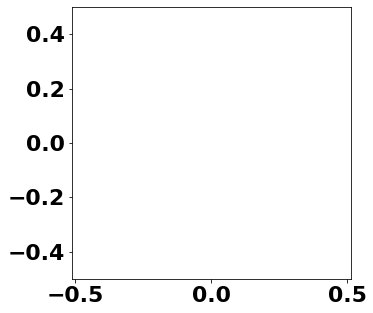

<Figure size 360x360 with 0 Axes>

In [85]:
for i in range(7):
    plt.figure(i,figsize=(5,5))
    plt.scatter(m.displacements[i].dx, m.displacements[i].dy)
    plt.axis('equal')
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)

In [84]:
F = 1.3E-2 * 1E-3 * 1E9
j_bulk = F/(1.9E-4 * 1E-2)
s_Ag = 62E6
s_gr = n*e*mu
j_gr = 0.3E-3/(20E-6*300E-12)
print("J_Ag: {:.3e} A/m^2".format(j_bulk))
print("sigma_Ag: {:.3e} S/m".format(s_Ag))
print("E_Ag: {:.3e} V/m".format(j_bulk/s_Ag))
print("J_Gr: {:.3e} A/m^2".format(j_gr))
print("sigma_gr: {:.3e} S/m".format(s_gr/(300E-12)))
print("E_Gr: {:.3e} V/m".format(j_gr*300E-12/s_gr))


NameError: name 'n' is not defined

In [83]:
x, y = np.meshgrid(np.linspace(0,100,96),np.linspace(0,100,96))
for frame in stp.frames:
    vgrad = np.gradient(frame)
    vgrad_mag = np.sqrt(vgrad[0]**2 + vgrad[1]**2)
    avg = np.average(vgrad_mag)

    plt.figure(figsize=(10,10))
    plt.quiver(np.linspace(0,100,96),np.linspace(0,100,96),vgrad[0],vgrad[1])
    #plt.imshow(vgrad_mag)
    plt.clim(avg-0.00005,avg+0.00005)
    #cbar = plt.colorbar()
    #plt.streamplot(x, y, vgrad[0], vgrad[1])

NameError: name 'stp' is not defined

In [ ]:
t2[t2.particle==9]

Frame 4: 38 trajectories present.


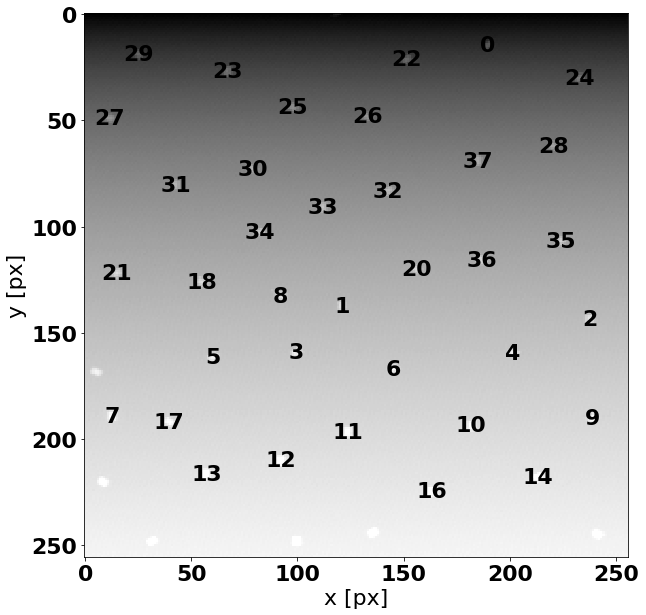

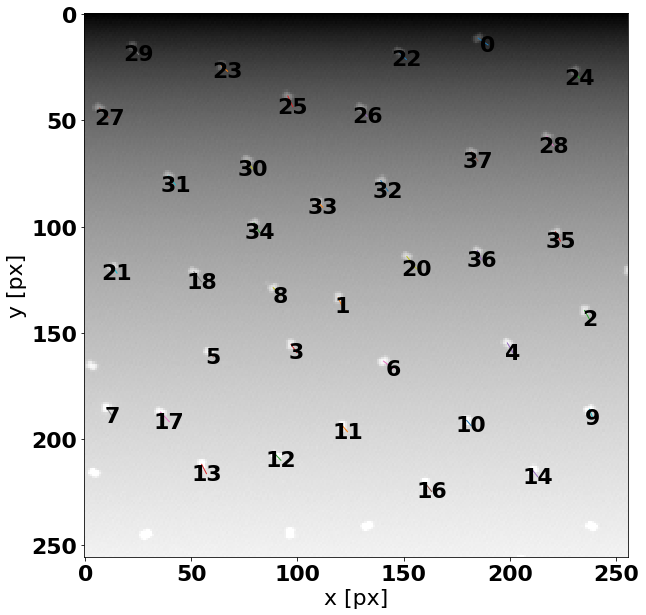

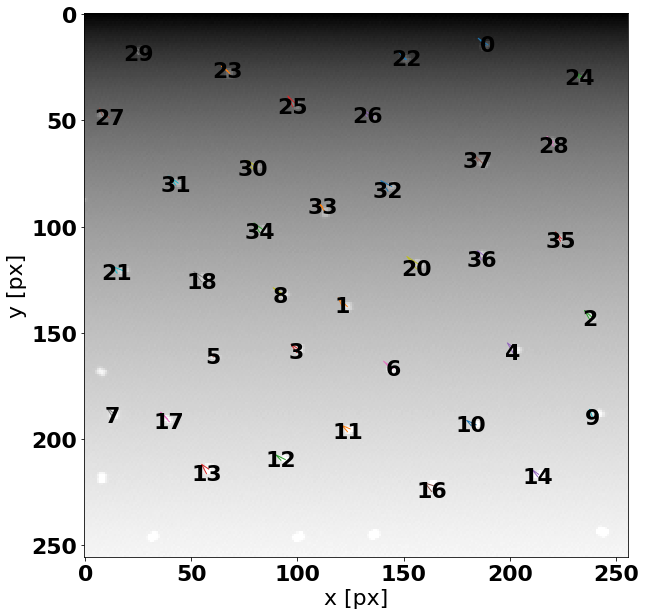

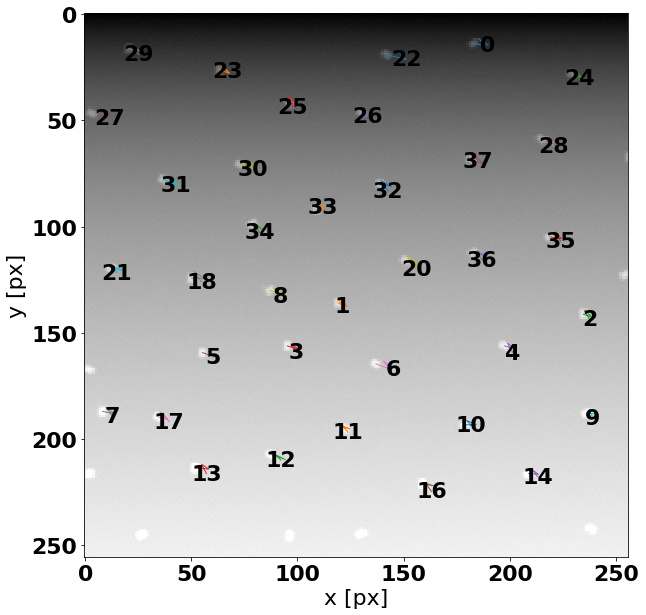

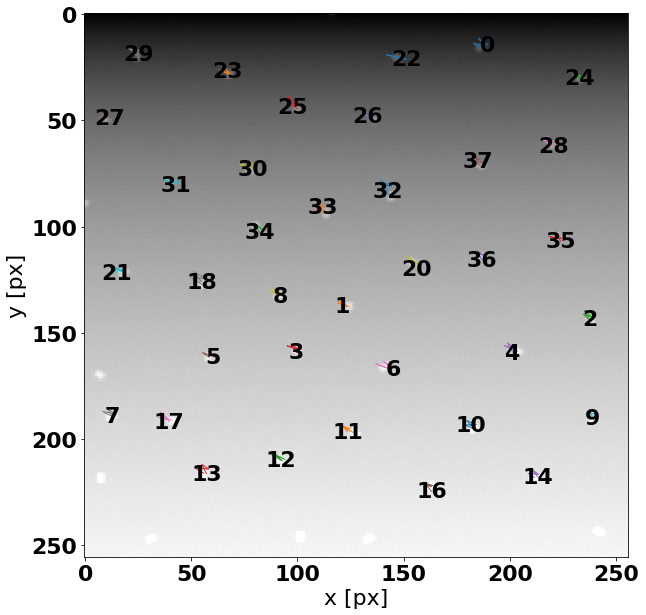

In [82]:
### USE THIS CODE TO FIND PARTICLE NUMBERS FOR MANUAL DRIFT CORRECTION
emds = []
i = -1

#-20Vg
Vg = -20
voltages_temperatures = np.linspace(10, 10, 1, dtype=np.float32)
START = 931
SIZE = 4
FOLDER = "electromigration_32"
sets = [range(START + SIZE * i, START + SIZE * (i + 1) + 1) for i in range(len(voltages_temperatures))]
emd = ExpMetaData(sets, Vg, voltages_temperatures, FOLDER)
emds.append(emd)


mpl.rc('figure',  figsize=(10, 10))
fileranges = emds[i].sets
folder_name = emds[i].folder
SXM_PATH = [[folder_name + "/Image_{0:03}.sxm".format(i) for i in fileranges[j]] for j in range(len(fileranges))]

with open('params.yaml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)       
Params = namedtuple(
            'Params', 
            ['molecule_size', 
             'min_mass',
             'max_mass',
             'separation',
             'min_size',
             'max_ecc',
             'adaptive_stop',
             'search_range',
             'diffusion_time'])
DIFFUSION_TIME = params['diffusion_time']
PARAMS = [Params(**params) for i in range(len(voltages_temperatures))]

ax, fig = plt.subplots()
for path in SXM_PATH:
    frames = SXMReader(path)
    molecule_size, min_mass, max_mass, separation, min_size, max_ecc, adaptive_stop, search_range, _ = PARAMS[i]
    f = tp.batch(frames, molecule_size, minmass=min_mass, separation=separation)
    t = tp.link(f, search_range=search_range, adaptive_stop=adaptive_stop)
    t1 = t[((t['mass'] > min_mass) & (t['size'] > min_size) &
         (t['ecc'] < max_ecc)) & (t['mass'] < max_mass)]
    t2 = tp.filter_stubs(t, 3)
    for j in range(len(path)):
        tp.plot_traj(t2[(t2['frame']<=j)], superimpose=frames[j], label=True, origin='lower')